**Praktikum Metode Numerik 2023 Semester Genap**

**Modul Pertemuan 3: Interpolasi**

Kembali ke [Metode Numerik](./metnum2023genap.qmd)

OUTLINE

* Review matplotlib

* Pengantar Interpolasi (penjelasan tanpa kode)

* Polinom Interpolasi Lagrange

* Metode Neville

* Newton Divided Difference (kode versi sederhana dan kode versi tabel bagus)

* Interpolasi Hermite dengan Polinom Lagrange

* Hermite Divided Difference (Interpolasi Hermite dengan Divided Difference)


# Review matplotlib

Anda telah mempelajari cara memplot fungsi dengan menggunakan *package* **matplotlib**. Di modul ini, Anda akan mengingat kembali apa yang sudah Anda pelajari.

Untuk menggunakan matplotlib, Anda harus meng-import package matplotlib terlebih dulu.

Setelah itu, definisikan nilai-nilai x dan y. Ukuran list untuk nilai-nilai x dan y harus sama.

Untuk membuat plot y vs x, gunakan plt.plot(x,y). Untuk memunculkan hasil plot, gunakan plt.show().

(Jika pada run pertama plot tidak muncul, silakan run ulang.)

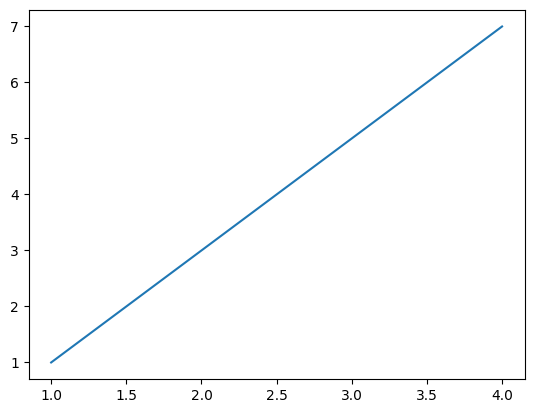

In [1]:
#import matplotlib.pyplot
import matplotlib.pyplot as plt

#syntax standar untuk mengeluarkan plot
x = [1,2,3,4]
y = [1,3,5,7]
plt.plot(x,y)
plt.show()

Terlihat x = 1 dipetakan ke y = 1, x = 3 dipetakan ke y = 5, dst. Setiap titik dihubungkan oleh garis lurus. Sehingga, untuk banyak titik yang sedikit, matplotlib kurang bagus untuk membuat plot fungsi selain linear. Sehingga untuk membuat plot fungsi selain linear, perlu lebih banyak titik.

Contoh berikut adalah membuat plot y = 2 dengan menggunakan empat titik. x

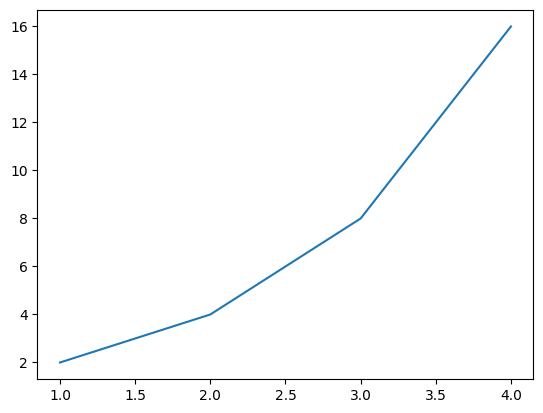

In [2]:
x = [1,2,3,4]
y = [2,4,8,16]
plt.plot(x,y)
plt.show()

Anda juga dapat menginput fungsi sendiri. Perhatikan syntax di bawah.

Masukkan formula fungsi: np.exp(x)


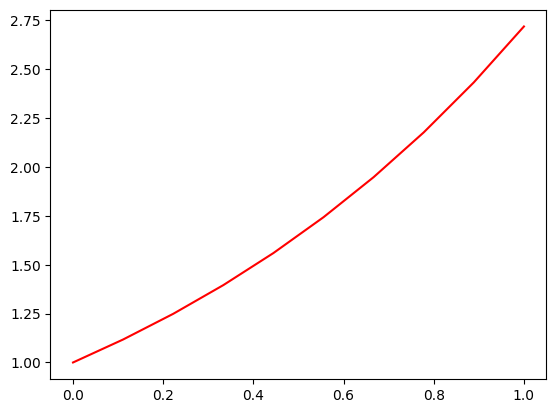

In [3]:
#plot fungsi
import numpy as np
fungsi = input('Masukkan formula fungsi: ')
def f(x):
    return eval(fungsi)

x = np.linspace(0,1,10)
y = f(x)
plt.plot(x,y,'r-') #garisnya merah
plt.show()

(Berapa titik yang digunakan untuk membuat plot di atas?)

Anda juga dapat membuat plot dari lebih dari satu fungsi pada satu gambar. Contoh di bawah adalah plot fungsi $f(x) = \text{exp}(x)$ (didefinisikan pada cell sebelumnya) dan $g(x) = 1 + x + \frac{x^2}{2}$.

Masukkan formula fungsi: 1 + x + (x**2)/2


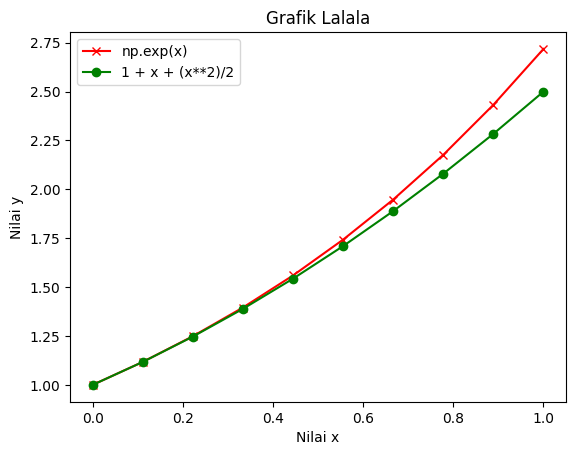

In [4]:
#plot dua fungsi
fungsi2 = input('Masukkan formula fungsi: ')
def g(x):
    return eval(fungsi2)

x = np.linspace(0,1,10)
y2 = g(x)
plt.plot(x,y,'r-x')
plt.plot(x,y2,'g-o')
plt.xlabel('Nilai x')
plt.ylabel('Nilai y')
plt.legend([fungsi,fungsi2])
plt.title('Grafik Lalala')
plt.show()

Ada beberapa syntax tambahan pada kode di atas, yaitu :
- plt.xlabel('Nilai x') membuat label 'Nilai x' pada sumbu x.
- plt.ylabel('Nilai y') membuat label 'Nilai y' pada sumbu y.
- plt.legend([fungsi1,fungsi2]) membuat legenda/keterangan mengenai plot. Argumennya berupa list.
- plt.title('Grafik Lalala') untuk membuat judul.

*Style* pada plot bisa ditambahkan di sebelah y pada perintah plt.plot(x,y). 'r-' artinya garis merah solid. 'g-o' artinya garis hijau dengan dot di setiap titik. Terdapat beberapa macam warna dan gaya garis yang bisa Anda gunakan dan bisa Anda cari sendiri di internet. ;>

# Pengantar Interpolasi (penjelasan tanpa kode)

Inti sari dari interpolasi adalah "menebak" bentuk suatu fungsi hanya berdasarkan data pada beberapa titik saja. Jenis interpolasi yang paling sederhana adalah interpolasi polinomial, di mana tebakan tersebut berupa polinom (meskipun mungkin fungsi aslinya bukan polinom).

Catatan: ciri khas dari interpolasi adalah bahwa hasil fungsi tebakan itu harus melewati atau memenuhi syarat semua titik atau data yang diketahui; tidak seperti regresi, di mana hasil tebakan cukup "mewakilkan" semua data yang ada.

Kegunaan interpolasi bukan hanya ketika fungsi tidak diketahui, tetapi juga bisa untuk "menyederhanakan" fungsi yang sudah diketahui (meskipun menjadi sedikit kurang akurat). Sebenarnya, interpolasi juga bisa dianggap sebagai jenis aproksimasi fungsi. Contohnya, interpolasi polinomial bisa digunakan untuk mengaproksimasi fungsi trigonometri (seperti sin, cos, dll) sebagai polinom.

Contoh yang lebih sederhana: diberikan tiga titik dari suatu fungsi $f(x)$, yaitu $(0,1)$, $(0.5, 0.5)$, dan $(1,0)$. Bagaimana cara menentukan (atau menebak) $f(0.75)$? Ada metode interpolasi polinomial yang menebak fungsinya secara keseluruhan, tetapi ada juga metode interpolasi polinomial yang hanya menebak nilai fungsi pada titik yang diperlukan (misal cukup pada $x=0.75$ saja).

Salah satu metode interpolasi polinomial yang menebak keseluruhan fungsi adalah polinom interpolasi Lagrange.

# Polinom Interpolasi Lagrange

## Penjelasan ide dengan contoh (indeks mulai dari 1)

Misal diketahui empat titik yaitu $(x_1, y_1)$, $(x_2, y_2)$, $(x_3, y_3)$, dan $(x_4, y_4)$. Ide polinom interpolasi Lagrange adalah membuat fungsi $P(x)$ sebagai berikut (yang diduga akan berupa polinom):

$$P(x) = y_1 L_{4,1} (x) + y_2 L_{4,2} (x) + y_3 L_{4,3} (x) + y_4 L_{4,4} (x)$$

Lalu apa itu fungsi $L_{n,k} (x)$? Pada *subscript* (tulisan di sebelah bawah), bilangan pertama adalah $n$ atau banyaknya titik, sedangkan bilangan kedua adalah $k$ atau titik ke-$k$. Fungsi $L_{n,k} (x)$ ini memang bergantung $k$, artinya tiap titik dipasangkan dengan suatu fungsi $L_{n,k} (x)$ yang sesuai.

Fungsi $L_{4,k} (x)$ tersebut diharapkan memiliki sifat sebagai berikut:

$$P(x_1) = \color{blue}{y_1 * 1} + \color{red}{y_2 * 0} + \color{red}{y_3 * 0} + \color{red}{y_4 * 0} = \color{blue}{y_1}$$

$$P(x_2) = \color{red}{y_1 * 0} + \color{blue}{y_2 * 1} + \color{red}{y_3 * 0} + \color{red}{y_4 * 0} = \color{blue}{y_2}$$

$$P(x_3) = \color{red}{y_1 * 0} + \color{red}{y_2 * 0} + \color{blue}{y_3 * 1} + \color{red}{y_4 * 0} = \color{blue}{y_3}$$

$$P(x_4) = \color{red}{y_1 * 0} + \color{red}{y_2 * 0} + \color{red}{y_3 * 0} + \color{blue}{y_4 * 1} = \color{blue}{y_4}$$

Artinya, $L_{n,k} (x_k) = 1$, sedangkan $L_{n,k} (x_i) = 0$ untuk nilai $i$ selain $k$ (lebih tepatnya, bernilai nol ketika ada titik ke-$i$ yaitu titik selain titik ke-$k$). Sebenarnya, kita tidak peduli apa nilai $L_{n,k} (x)$ untuk apapun nilai $x$ selain titik yang diketahui.

Mengingat sifat yang diharapkan, kita bisa merancang fungsi $L_{4,k} (x)$ sebagai berikut untuk $k = 1, 2, 3, 4$:

$$L_{4,1} (x) = \frac{(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_2)(x_1-x_3)(x_1-x_4)}$$

$$L_{4,2} (x) = \frac{(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_1)(x_2-x_3)(x_2-x_4)}$$

$$L_{4,3} (x) = \frac{(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_4)}$$

$$L_{4,4} (x) = \frac{(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)}$$

Perhatikan:
* bagian pembilang terdiri dari perkalian $(x-x_i)$ untuk semua $i$ kecuali $i=k$. Tujuannya, ketika $L_{4,k} (x)$ itu disubstitusikan $x=x_i$ untuk $i$ selain $k$, hasilnya menjadi $L_{4,k} (x_i) = 0$, kecuali untuk $x=x_k$ itu hasilnya tidak nol.
* bagian penyebut/pembagi itu sebenarnya sama saja dengan pembilang, tapi disubstitusikan $x=x_k$. Tujuannya, ketika $L_{4,k} (x)$ disubstitusikan dengan $x=x_k$, apapun hasil taknol dari pembilang itu dibagi dengan dirinya sendiri agar menjadi $L_{4,k} (x_k) = 1$.

Dengan demikian, $P(x)$ bisa terbentuk. Perhatikan bahwa $L_{n,k} (x)$ berbentuk polinom, sehingga $P(x)$ yang terbentuk juga akan berupa polinom. Sehingga, metode polinom interpolasi Lagrange berhasil menghasilkan polinom interpolasi. Ide ini berlaku umum untuk banyaknya titik $n$ sebesar apapun.

Perhatikan bahwa masing-masing fungsi $L_{4,k} (x)$ bisa dituliskan sebagai berikut:

$$L_{4,1} (x) = \frac{(x-x_2)}{(x_1-x_2)} * \frac{(x-x_3)}{(x_1-x_3)} * \frac{(x-x_4)}{(x_1-x_4)}$$

$$L_{4,2} (x) = \frac{(x-x_1)}{(x_2-x_1)} * \frac{(x-x_3)}{(x_2-x_3)} * \frac{(x-x_4)}{(x_2-x_4)}$$

$$L_{4,3} (x) = \frac{(x-x_1)}{(x_3-x_1)} * \frac{(x-x_2)}{(x_3-x_2)} * \frac{(x-x_4)}{(x_3-x_4)}$$

$$L_{4,4} (x) = \frac{(x-x_1)}{(x_4-x_1)} * \frac{(x-x_2)}{(x_4-x_2)} * \frac{(x-x_3)}{(x_4-x_3)}$$

atau, di mana warna merah artinya tidak dituliskan,

$$\text{Untuk } k=1, \text{ } L_{4,1} (x) = \color{red}{\frac{(x-x_1)}{(x_1-x_1)} * } \color{black}{\frac{(x-x_2)}{(x_1-x_2)} * \frac{(x-x_3)}{(x_1-x_3)} * \frac{(x-x_4)}{(x_1-x_4)}}$$

$$\text{Untuk } k=2, \text{ } L_{4,2} (x) = \frac{(x-x_1)}{(x_2-x_1)} \color{red}{* \frac{(x-x_2)}{(x_2-x_2)}} \color{black}{* \frac{(x-x_3)}{(x_2-x_3)} * \frac{(x-x_4)}{(x_2-x_4)}}$$

$$\text{Untuk } k=3, \text{ } L_{4,3} (x) = \frac{(x-x_1)}{(x_3-x_1)} * \frac{(x-x_2)}{(x_3-x_2)} \color{red}{* \frac{(x-x_3)}{(x_3-x_3)}} \color{black}{* \frac{(x-x_4)}{(x_3-x_4)}}$$

$$\text{Untuk } k=4, \text{ } L_{4,4} (x) = \frac{(x-x_1)}{(x_4-x_1)} * \frac{(x-x_2)}{(x_4-x_2)} * \frac{(x-x_3)}{(x_4-x_3)} \color{red}{* \frac{(x-x_4)}{(x_4-x_4)}}$$

Dengan demikian, pembentukan fungsi $L_{n,k} (x)$ secara pemrograman bisa dilakukan dengan perkalian iteratif, seperti iterasi $i = 1, 2, 3, 4$, tetapi dengan syarat $i \ne k$.

## Bentuk umum (indeks mulai dari 0) dan kode

Bila diberikan $n+1$ titik $x_0, x_1, \dots, x_n$, dan $f$ adalah fungsi yang nilainya pada titik-titik tersebut diberikan, maka **polinom interpolasi Lagrange ke-n** didefinisikan sebagai

$$P(x) = f(x_0) L_{n,0}(x_0) + f(x_1) L_{n,1}(x_1) + \cdots f(x_n) L_{n,n}(x_n)$$

di mana, untuk setiap $k = 0, 1, \dots, n$,

$$L_{n,k}(x) = \prod_{\substack{i=0 \\ i\ne k}}^{n} \frac{x - x_i}{x_k - x_i}$$

di mana $\Pi$ atau pi besar melambangkan perkalian yang "berulang" atau "teriterasi", layaknya $\Sigma$ (sigma besar) yang melambangkan penjumlahan yang "berulang" atau "teriterasi". Perhatikan syarat $i\ne k$.

In [5]:
import sympy
x = sympy.symbols('x')

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

titik_x = eval(input("Masukkan list nilai x : "))
titik_y = eval(input("Masukkan list nilai fungsi di titik-titik tersebut : "))
eval_x = eval(input("Masukkan nilai x yang akan diaproksimasi nilai fungsinya : "))

def LagrangePol(x, x_points, y_points):
    pol = 0 # nilai awal polinom sebelum ditambahkan apa-apa
    n = len(x_points) # n adalah banyak titik
    for k in range(n): # membuat y*L_(n,k) untuk tiap k
        L = 1 # nilai awal fungsi L
        for i in range(n):
            if i!=k: # syarat i != k
                L *= ((x-x_points[i])/(x_points[k]-x_points[i])) # iterasi perkalian
        pol += y_points[k]*L # menambahkan pasangan y*L ke polinom
    return pol

y_lagrange = LagrangePol(x, titik_x, titik_y)
# bentuk masih berantakan, sehingga perlu disederhanakan:
y_sederhana = sympy.simplify(y_lagrange)
# perlu diubah menjadi function biasa agar bisa disubstitusikan nilai x:
y_function = sympy.lambdify(x, y_sederhana)
# akhirnya bisa substitusi:
nilai_y = y_function(eval_x)

print("Polinom hasil interpolasi Lagrange:")
sympy.pprint(y_lagrange)
print("Disederhanakan:")
sympy.pprint(y_sederhana)
print("Aproksimasi nilai fungsi di x = {0} adalah y = {1:.5f}".format(eval_x, nilai_y))


Masukkan list nilai x : [1, 2, 3, 4]
Masukkan list nilai fungsi di titik-titik tersebut : [1, 4, 9, 16]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Polinom hasil interpolasi Lagrange:
⎛4   x⎞ ⎛3   x⎞             ⎛    x⎞                             ⎛x   1⎞       
⎜─ - ─⎟⋅⎜─ - ─⎟⋅(2 - x) + 4⋅⎜2 - ─⎟⋅(3 - x)⋅(x - 1) + 9⋅(4 - x)⋅⎜─ - ─⎟⋅(x - 2
⎝3   3⎠ ⎝2   2⎠             ⎝    2⎠                             ⎝2   2⎠       

       ⎛x   1⎞ ⎛x    ⎞        
) + 16⋅⎜─ - ─⎟⋅⎜─ - 1⎟⋅(x - 3)
       ⎝3   3⎠ ⎝2    ⎠        
Disederhanakan:
 2
x 
Aproksimasi nilai fungsi di x = 1.5 adalah y = 2.25000


# Metode Neville

Di antara semua metode interpolasi yang dibahas di sini, Metode Neville adalah satu-satunya metode yang tidak menghasilkan polinom atau bentuk umum, melainkan hanya hasil aproksimasi nilai $f(x)$ di satu titik $x$. Namun, Metode Neville tetap perlu menerima data berapa titik, misal sebanyak $k+1$ titik $x_0, x_1, x_2, \dots, x_k$.

Keunggulan Metode Neville adalah, kita bisa dengan mudah menambahkan baris baru di bagian bawah tabel (dengan beberapa perhitungan tambahan) untuk mendapatkan hasil aproksimasi yang lebih akurat apabila diperoleh data baru. Oleh karena itu, pembuatan tabel Metode Neville bisa dilakukan secara rekursif.

Menariknya, pada Metode Neville, semua bilangan pada tabel adalah hasil aproksimasi nilai $f(x)$ pada $x$ yang diminta. Namun, semakin ke kanan, semakin akurat.

Misalkan sudah diperoleh data $k+1$ titik $x_0, x_1, \dots, x_k$. Akan dibuat tabel Metode Neville berukuran $(k+1)$ kali $(k+1)$, yaitu dengan indeks baris $0,1,\dots,k-1,k$ dan juga indeks kolom $0,1,\dots,k-1,k$ (karena indeks di Python mulai dari nol).

Untuk indeks baris $i$ dan indeks kolom $j$ pada tabel, ketika $i \ge j$, nilai tabel pada indeks baris dan indeks kolom tersebut adalah $Q_{i,j}$, yang dihitung sebagai berikut:

$$Q_{i,j} = \frac{(x-x_{(i-j)})Q_{(i,j-1)} - (x-x_i)Q_{(i-1,j-1)}}{x_i - x_{(i-j)}}$$

di mana $x$ adalah nilai $x$ untuk titik yang ingin dihitung aproksimasi $f(x)$ nya.

In [6]:
from tabulate import tabulate

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

titik_x = eval(input("Masukkan list nilai x : "))
titik_y = eval(input("Masukkan list nilai y di titik-titik tersebut : "))
eval_x = eval(input("Masukkan nilai x yang akan diaproksimasi nilai fungsinya : "))

# fungsi untuk menambahkan baris baru pada tabel Neville yang sudah ada
def TambahkanNeville(tabel_lama, list_x, x_target, x_baru, y_baru):
    # Duplikasi list_x jadi list_x_baru
    list_x_baru = []
    for nilai in list_x:
        list_x_baru.append(nilai)
    # Tambahkan x_baru ke list_x_baru
    list_x_baru.append(x_baru)

    # Duplikasi tabel lama menjadi tabel baru
    tabel_baru = []
    for baris in tabel_lama:
        calon_baris = []
        for nilai in baris:
            calon_baris.append(nilai)
        tabel_baru.append(calon_baris)
    
    # Tambahkan kolom kosong pada baris-baris yang sudah ada
    for i in range(len(tabel_baru)):
        tabel_baru[i].append("")
    
    # Membuat baris baru...
    baris_baru = [y_baru]
    # ... dengan kolom sebanyak len(tabel_baru)+1:
    for i in range(len(tabel_baru)):
        baris_baru.append("")
    # meskipun saat ini kosong, setelah ini akan diisi sesuai rumus Q.
    # Tambahkan dulu ke tabel (sebagai baris paling bawah terbaru):
    tabel_baru.append(baris_baru)

    # Mengisi baris paling bawah
    k = len(baris_baru) # banyaknya titik termasuk titik baru
    i = k-1 # baris baru adalah baris ke-i, dengan indeks (k-1)
    for j in range(1, k): # untuk Q_{i,1}, Q_{i,2}, ...
        # Menghitung Q_{i,j} secara perlahan
        pembilang_kiri = (x_target - list_x_baru[i-j]) * tabel_baru[i][j-1]
        pembilang_kanan = (x_target - list_x_baru[i]) * tabel_baru[i-1][j-1]
        pembilang = pembilang_kiri - pembilang_kanan
        tabel_baru[i][j] = (pembilang)/(list_x_baru[i] - list_x_baru[i-j])

    # Tabel sudah jadi
    return tabel_baru, list_x_baru

# Menggunakan Tabulate
def OlahanNeville(tabel_utama, list_x):
    k = len(tabel_utama) # banyaknya baris

    # Duplikasi tabel utama menjadi tabel lengkap
    tabel_lengkap = []
    for baris in tabel_utama:
        calon_baris = []
        for nilai in baris:
            calon_baris.append(nilai)
        tabel_lengkap.append(calon_baris)

    # Sisipkan kolom x_i kemudian i untuk tiap baris
    for i in range(k):
        tabel_lengkap[i].insert(0, list_x[i])
        tabel_lengkap[i].insert(0, i)

    header_list = ["i", "x_i"]
    for j in range(k):
        # Menambahkan header Q_{i,0}, Q_{i,1}, ...
        header_list.append("Q_{i," + str(j) + "}")

    tabel_olahan = tabulate(
        tabel_lengkap,
        headers = header_list,
        tablefmt = "orgtbl"
    )

    return tabel_olahan

# Kode program Metode Neville
def MetodeNeville(list_x_awal, list_y, x_target):
    # tabel_utama (tabel Neville) terdiri dari semua kolom kecuali kolom nilai x
    tabel_utama = [
        [list_y[0]]
    ]
    # mula-mula, hanya ada satu titik,
    # sehingga hanya ada satu baris dan satu kolom

    # Duplikai list_x_awal jadi list_x
    list_x = []
    for nilai in list_x_awal:
        list_x.append(nilai)

    k = len(list_x)

    # lakukan TambahkanNeville untuk tiap titik berikutnya
    for i in range(1, k):
        tabel_utama, temp = TambahkanNeville(
            tabel_utama,
            list_x[:i], # seolah-olah baru ada titik sampai titik ke (i-1)
            x_target,
            list_x[i], list_y[i] # titik baru, titik ke (i)
        )
    
    tabel_olahan = OlahanNeville(tabel_utama, list_x)
    print("Tabel Metode Neville:")
    print(tabel_olahan)

    # Looping

    jawaban = input("Apakah Anda ingin menambahkan titik? (y/n): ")
    if jawaban == "y":
        ingin_menambahkan = True
    
    while ingin_menambahkan:
        x_baru = eval(input("Masukkan nilai x baru: "))
        y_baru = eval(input("Masukkan nilai y baru: "))
        print()

        tabel_utama, list_x = TambahkanNeville(
            tabel_utama, list_x, x_target, x_baru, y_baru
        )

        tabel_olahan = OlahanNeville(tabel_utama, list_x)
        print("Berikut tabel Metode Neville yang baru:")
        print(tabel_olahan)

        jawaban = input("Apakah Anda ingin menambahkan titik? (y/n): ")
        if jawaban != "y":
            ingin_menambahkan = False
    
    print()
    print("Terima kasih telah menggunakan program.")

MetodeNeville(titik_x, titik_y, eval_x)

Masukkan list nilai x : [1.0, 1.3, 1.6]
Masukkan list nilai y di titik-titik tersebut : [0.7651977, 0.6200860, 0.4554022]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Tabel Metode Neville:
|   i |   x_i |   Q_{i,0} | Q_{i,1}            | Q_{i,2}            |
|-----+-------+-----------+--------------------+--------------------|
|   0 |   1   |  0.765198 |                    |                    |
|   1 |   1.3 |  0.620086 | 0.5233448666666667 |                    |
|   2 |   1.6 |  0.455402 | 0.5102968          | 0.5124714777777778 |
Apakah Anda ingin menambahkan titik? (y/n): y
Masukkan nilai x baru: 1.9
Masukkan nilai y baru: 0.2818186

Berikut tabel Metode Neville yang baru:
|   i |   x_i |   Q_{i,0} | Q_{i,1}            | Q_{i,2}            | Q_{i,3}            |
|-----+-------+-----------+--------------------+--------------------+--------------------|
|   0 |   1   |  0.765198 |                    |                    |                    |
|   1 |   1.3 |  0.6200

# Newton Divided Difference (NDD)

## Kode Versi Sederhana

NDD memiliki bentuk sebagai berikut :

$$P_n (x) = f[x_0] + \sum_{k=1}^{n} f[x_0, x_1, \dots, x_k](x-x_0)(x-x_1)\dots (x-x_k)$$

di mana $f[x_k] = f(x_k)$ dan

$$f[x_i, x_{i+1}, \dots, x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \dots, x_{i+k}]-f[x_i, x_{i+1}, \dots, x_{i+k-1}]}{x_{i+k} - x_i}$$

Pada rumusan di atas, $f[x_i x_{i+1}, \dots, x_{i+k}]$ disebut **k-th divided difference** relatif terhadap $x_i x_{i+1}, \dots, x_{i+k}$.

Dalam membentuk polinomial interpolasi dengan NDD, seringkali tabel divided difference dibuat untuk memudahkan. Tabel tersebut berbentuk seperti berikut.

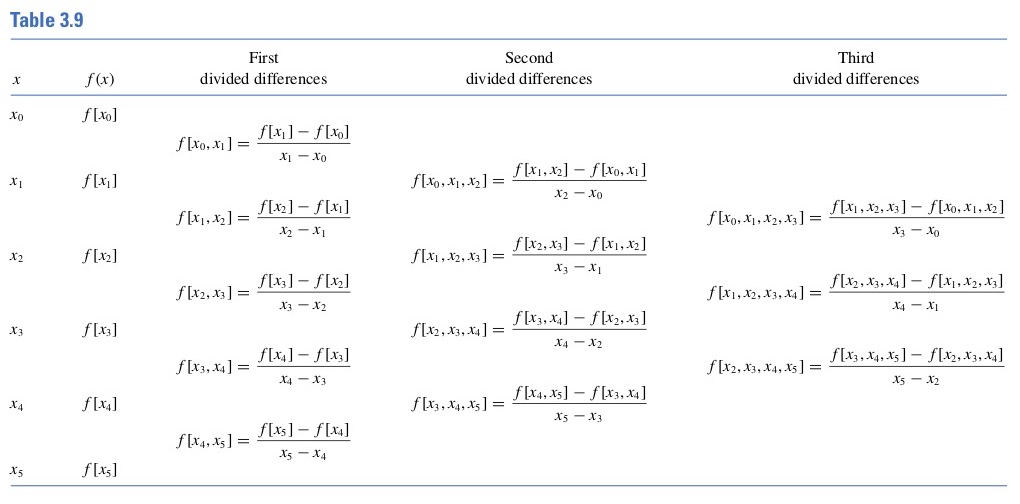

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Bab 3, "Interpolation and Polynomial Approximation". Subbab 3.3, "Divided Differences". Hlm. 126

Ada dua cara pembentukan polinomial interpolasi dengan DD, yaitu cara **Forward** dan **Backward**.

1. Forward DD menggunakan baris paling atas dari setiap kolom pada tabel DD.

$$P_n (x) = f[x_0] + \sum_{k=1}^{n} f[x_0, x_1, \dots, x_k] (x-x_0) (x-x_1) \dots (x-x_{k-1})$$

2. Backward DD menggunakan baris paling akhir dari setiap kolom pada tabel DD.

$$P_n (x) = f[x_n] + \sum_{k=1}^{n} f[x_n, x_{n-1}, \dots, x_{n-k}] (x-x_n) (x-x_{n-1}) \dots (x - x_{n-k+1})$$

Kode Python untuk menginterpolasi titik-titik data dengan menggunakan NDD adalah sebagai berikut.

In [7]:
import sympy
x = sympy.symbols('x')

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

titik_x = eval(input('Masukkan list nilai x : '))
titik_y = eval(input('Masukkan list nilai fungsi di titik-titik tersebut : '))
eval_x = eval(input('Masukkan nilai x yang akan diaproksimasi nilai fungsinya : '))

def DDTableGenerator(x_points, y_points): #buat fungsi untuk membuat tabel DD
    DDTable = [y_points] #kolom-kolom pada tabel. Kolom pertama berisi f
    for column in range(1,len(y_points)):
        DDcolumn = [] #isi dari setiap kolom
        for row in range(len(DDTable[-1])-1): #mulai mengisi kolom tabel
            DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row])
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) #tambahkan kolom yang telah diisi ke tabel
    return DDTable

def ForwardDD(x, x_points, y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
    return pol

def BackwardDD(x, x_points, y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
    return pol

forw_pol = ForwardDD(x, titik_x,titik_y)
back_pol = BackwardDD(x, titik_x,titik_y)

forw_sederhana = sympy.simplify(forw_pol)
back_sederhana = sympy.simplify(back_pol)

forw_function = sympy.lambdify(x, forw_sederhana)
back_function = sympy.lambdify(x, back_sederhana)

nilai_forw = forw_function(eval_x)
nilai_back = back_function(eval_x)

print("Polinom hasil foward DD:")
sympy.pprint(forw_pol)
print("disederhanakan:")
sympy.pprint(forw_sederhana)
print("Polinom hasil backward DD:")
sympy.pprint(back_pol)
print("disederhanakan:")
sympy.pprint(back_sederhana)

print("Aproksimasi nilai fungsi di x = {0} adalah : ".format(eval_x))
print("Forward DD : {0:.5f}".format(nilai_forw))
print("Backward DD : {0:.5f}".format(nilai_back))

Masukkan list nilai x : [1, 2, 3, 4]
Masukkan list nilai fungsi di titik-titik tersebut : [1, 4, 9, 16]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Polinom hasil foward DD:
3.0⋅x + 1.0⋅(x - 2)⋅(x - 1) - 2.0
disederhanakan:
     2
1.0⋅x 
Polinom hasil backward DD:
7.0⋅x + 1.0⋅(x - 4)⋅(x - 3) - 12.0
disederhanakan:
     2
1.0⋅x 
Aproksimasi nilai fungsi di x = 1.5 adalah : 
Forward DD : 2.25000
Backward DD : 2.25000


## Kode Versi Tabel Bagus

Kode versi sebelumnya lebih sederhana, namun sayangnya tidak bisa menampilkan tabel *divided difference*. Kode yang akan dijelaskan di bagian ini, walaupun lebih rumit, tetapi pada akhirnya lebih intuitif, karena nantinya proses pembuatan polinom Forward DD dan Backward DD akan langsung menggunakan data dari tabel yang sudah dibentuk. (Lagipula, enak kan kalo bisa liat tabelnya? Hehe)

Kita review kembali, metode interpolasi Newton Divided Difference (NDD) melibatkan pembuatan tabel besar seperti berikut:

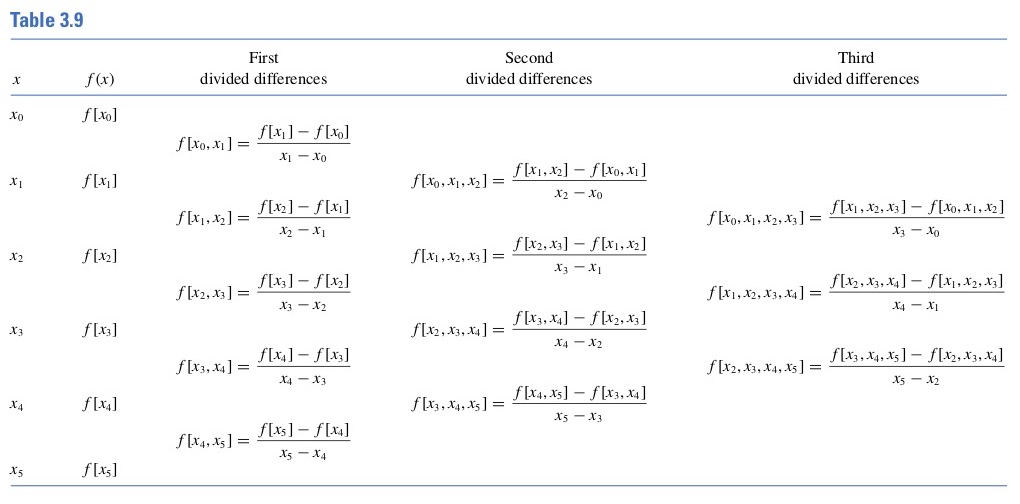

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Bab 3, "Interpolation and Polynomial Approximation". Subbab 3.3, "Divided Differences". Hlm. 126

Data pada dua kolom pertama adalah data titik $(x, y)$ yang diketahui, sedangkan perhitungan data pada tiap kolom lainnya (*first divided differences, second divided differences*, dll.) itu bergantung pada kolom sebelumnya.

Pembuatan tabel Newton Divided Differences (NDD) melibatkan suatu fungsi $f$ dengan kurung siku, dengan rumus sesuai tabel di atas. Istilah "divided differences" artinya "beda/selisih yang saling dibagi", sesuai rumus $f$ tersebut.

Ketika hanya terdiri dari satu input, $f[x_k] = f(x_k) = y_k$, untuk suatu data titik $(x_k, y_k)$ yang diketahui.

Secara umum, rumusnya adalah

$$f[x_i, x_{i+1}, \dots, x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \dots, x_{i+k}]-f[x_i, x_{i+1}, \dots, x_{i+k-1}]}{x_{i+k} - x_i}$$

Untuk titik yang banyak, penulisan nama fungsi $f[\dots]$ bisa menjadi sangat panjang. Perhatikan bahwa isi inputnya selalu berurutan, misal dari $x_a$ sampai $x_b$. Kita bisa mendefinisikan suatu fungsi untuk mempersingkat penulisan tersebut, misal kita namakan F-rentang atau kita singkat FR:

$$\text{FR}(a, b) = f[x_a, x_{a+1}, x_{a+2}, \dots, x_{b-2}, x_{b-1}, x_b]$$

yaitu fungsi yang sebenarnya menerima input berupa rentang nilai $x_k$ dari $x_a$ ($k=a$) sampai $x_b$ ($k=b$).

Maka, rumus $f$ di atas dapat disingkat menjadi

$$\text{FR}(a, a+k) = \frac{\text{FR}(a+1, a+k) - \text{FR}(a, a+k-1)}{x_{a+k}-x_a}$$

Dengan memasang $b = a+k$, diperoleh

$$\text{FR}(a, b) = \frac{\text{FR}(a+1, b) - \text{FR}(a, b-1)}{x_b-x_a}$$

Menariknya, pada tabel,

* nilai $\text{FR}(a, b-1)$ selalu terletak di sebelah kiri atas dari $\text{FR}(a, b)$
* nilai $\text{FR}(a+1, b)$ selalu terletak di sebelah kiri bawah dari $\text{FR}(a, b)$

Dengan demikian, bisa saja kita memrogram perhitungan NDD menggunakan tabel.

Seolah-olah, rumusnya adalah "kiri bawah dikurang kiri atas, dibagi $x_b - x_a$".

Selain itu, untuk data sebanyak $n+1$,

* ada sebanyak $n$ kolom *divided difference*.
* dengan banyak kotak kosong (seperti pada gambar di atas), tabel utama terdiri dari $2n+1$ baris dan $n+1$ kolom, termasuk kolom $f(x_i)$ tetapi tidak termasuk kolom $x_i$.

Dengan demikian, kita dapat menghitung banyaknya data (yang kita anggap sebanyak $n+1$), kemudian menghitung $n$ (tinggal dikurang 1), lalu mulai membangun tabel berdasarkan sifat baris dan kolom tersebut.

Istilah "tabel utama" yang kita gunakan di sini merujuk pada tabel *divided difference* dari kolom $f(x_k)$ sampai kolom *divided difference* ke-n, tanpa adanya kolom $x_i$ maupun $i$. Untuk ke depannya, tabel *divided difference* yang lengkap (yang termasuk kolom $x_i$ dan $i$) akan kita sebut "tabel besar", dibedakan dengan tabel utama.

In [8]:
from tabulate import tabulate

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

# menyusun tabel Newton Divided Differences (NDD)
def CreateDDTable(list_x, list_y):
    # === Menyusun tabel utama === #
    # mengandung kolom f(x_i) serta semua kolom divided difference

    MainDDTable = []
    banyak_data = len(list_x) # = n + 1
    n = banyak_data - 1
    
    # mengisi tabel dengan string kosong
    # ingat: 2n+1 baris, n+1 kolom
    for i in range(2*n+1):
        calon_baris = []
        for j in range(n+1):
            calon_baris.append("")
        MainDDTable.append(calon_baris)
    
    # mengisi kolom pertama dengan nilai y_i = f(x_i)
    for i in range(0, 2*n+1, 2): # untuk tiap baris, lompat 2
        MainDDTable[i][0] = list_y[int(i/2)]
    
    # iterasi mengisi tiap kolom divided difference
    for j in range(1, n+1): # untuk tiap kolom divided difference
        # nilai a dan b untuk DD yang paling atas pada kolom
        a = 0
        b = j # nilai b pertama adalah j, selalu sesuai kolom DD ke-j
        for i in range(j, 2*n - j + 1, 2): # untuk tiap baris, lompat 2
            # iterasi dimulai dari baris j,
            # baris terakhir adalah baris dengan indeks 2*n - j.
            # Alasannya: total baris sebanyak 2*n + 1 (indeks 2*n),
            # dan secara umum, pada kolom DD ke-j, perhitungan DD terakhir
            # adalah pada j baris sebelum baris terakhir pada tabel,
            # sehingga baris terakhir tersebut ada pada indeks 2*n - j.
            # Pada for loop, kita gunakan 2*n - j + 1
            # agar baris terakhir menjadi 2*n - j (karena keanehan Python)

            # kiri bawah dikurang kiri atas, dibagi (x_b - x_a)
            MainDDTable[i][j] = (MainDDTable[i+1][j-1] - MainDDTable[i-1][j-1])/(list_x[b] - list_x[a])
            # memperbarui nilai a dan b untuk iterasi selanjutnya
            a += 1
            b += 1
    
    # === Menyusun tabel besar === #

    # duplikasi MainDDTable
    BigDDTable = []
    for row in MainDDTable:
        calon_baris = []
        for col in row:
            calon_baris.append(col)
        BigDDTable.append(calon_baris)

    # tempel kolom nilai i dan x_i di sebelah kiri tabel
    for i in range(2*n+1):
        indeks_x = int(i/2)
        if i % 2 == 0: # baris berindeks genap, seperti baris pertama (i=0)
            BigDDTable[i].insert(0, list_x[indeks_x])
            BigDDTable[i].insert(0, indeks_x)
        else:
            BigDDTable[i].insert(0, "")
            BigDDTable[i].insert(0, "")
    
    # menyusun list semua header
    semua_header = ["i", "x_i", "f(x_i)"]
    for k in range(1, n+1):
        semua_header.append("DD ke-" + str(k))

    olahan_BigDDTable = tabulate(BigDDTable, headers=semua_header,
                                 tablefmt="orgtbl")
    
    return MainDDTable, olahan_BigDDTable

In [9]:
titik_x = eval(input('Masukkan list nilai x : '))
titik_y = eval(input('Masukkan list nilai fungsi di titik-titik tersebut : '))

tabel_utama, tabel_olahan = CreateDDTable(titik_x, titik_y)

print("Tabel Newton Divided Difference:")
print(tabel_olahan)

Masukkan list nilai x : [1.0, 1.3, 1.6, 1.9, 2.2]
Masukkan list nilai fungsi di titik-titik tersebut : [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
Tabel Newton Divided Difference:
| i   | x_i   | f(x_i)    | DD ke-1             | DD ke-2              | DD ke-3             | DD ke-4               |
|-----+-------+-----------+---------------------+----------------------+---------------------+-----------------------|
| 0   | 1.0   | 0.7651977 |                     |                      |                     |                       |
|     |       |           | -0.4837056666666664 |                      |                     |                       |
| 1   | 1.3   | 0.620086  |                     | -0.10873388888888935 |                     |                       |
|     |       |           | -0.548946           |                      | 0.06587839506172834 |                       |
| 2   | 1.6   | 0.4554022 |                     | -0.04944333333333385 |                     |

Nantinya, dari tabel NDD yang sudah lengkap, ada dua jenis polinom interpolasi NDD yang dapat diperoleh, yaitu Newton Forward-Difference dan Newton Backward-Difference, tergantung nilai mana pada tabel yang digunakan. Misalkan ada data sebanyak $n+1$ titik, yaitu $x_0, x_1, x_2, \dots, x_{n-1}, x_n$. Maka, akan ada sebanyak $n$ kolom *divided differences* pada tabel.

1. Newton Forward-Difference (juga disebut Forward DD) menggunakan baris paling atas dari setiap kolom pada tabel DD.

$$P_n (x) = f[x_0] + \sum_{k=1}^{n} f[x_0, x_1, \dots, x_k] \left( \prod_{j=0}^{k-1} (x-x_j) \right)$$

2. Newton Backward-Difference (juga disebut Backward DD) menggunakan baris paling akhir dari setiap kolom pada tabel DD.

$$P_n (x) = f[x_n] + \sum_{k=1}^{n} f[x_{n-k}, \dots, x_{n-1}, x_n] \left( \prod_{j=n-k+1}^{n} (x-x_j) \right)$$

Catatan: $f[x_n, x_{n-1}, \dots, x_{n-k}] = f[x_{n-k}, \dots, x_{n-1}, x_n]$. Artinya, penulisan terbalik (seperti di beberapa sumber referensi Metode Numerik) sebenarnya tidak mempengaruhi perhitungan.

Menyingkat penulisan dengan $\text{FR}(a, b)$, kita peroleh:

1. Forward DD

$$P_n (x) = f[x_0] + \sum_{k=1}^{n} \text{FR}(0, k) \left( \prod_{j=0}^{k-1} (x-x_j) \right)$$

atau, mengingat bahwa $\text{FR}(0, 0) = f[x_0]$, kemudian menjabarkan,

\[
\begin{align*}
P_n (x) = \text{FR}(0, 0) &+ \text{FR}(0, 1) (x-x_0) \\
&+ \text{FR}(0, 2) (x-x_0)(x-x_1) \\
&+ \dots \\
&+ \text{FR}(0, n)\prod_{j=0}^{n-1} (x-x_j)
\end{align*}
\]

2. Backward DD

$$P_n (x) = f[x_n] + \sum_{k=1}^{n} \text{FR}(n-k, n) \left( \prod_{j=n-k+1}^{n} (x-x_j) \right)$$

atau, mengingat bahwa $\text{FR}(n, n) = f[x_n]$, kemudian menjabarkan,

\[
\begin{align*}
P_n (x) = \text{FR}(n, n) &+ \text{FR}(n-1, n) (x-x_n) \\
&+ \text{FR}(n-2, n) (x-x_{n-1}) (x-x_n) \\
&+ \dots \\
&+ \text{FR}(0, n) \prod_{j=1}^{n} (x-x_j)
\end{align*}
\]

In [10]:
# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

from tabulate import tabulate

import sympy
x = sympy.symbols('x')

titik_x = eval(input('Masukkan list nilai x : '))
titik_y = eval(input('Masukkan list nilai fungsi di titik-titik tersebut : '))
eval_x = eval(input('Masukkan nilai x yang akan diaproksimasi nilai fungsinya : '))

# Kita asumsikan function/fungsi CreateDDTable sudah terdefinisi sebelumnya.
# Kalau belum terdefinisi, boleh copy-paste definisi fungsinya ke sini

tabel_utama, tabel_olahan = CreateDDTable(titik_x, titik_y)

print("Tabel Newton Divided Difference:")
print(tabel_olahan)
print() # jaga jarak dengan print yang selanjutnya

def ForwardDD(tabel_utama, list_x):
    banyak_data = len(tabel_utama[0])
    pol = 0
    for k in range(0, banyak_data): # tiap suku penjumlahan
        suku = tabel_utama[k][k] # FR(0, k)
        for j in range(0, k): # perkalian dari j=0 sampai j=k-1
            suku *= (x - list_x[j])
        pol += suku
    return pol

def BackwardDD(tabel_utama, list_x):
    banyak_data = len(tabel_utama[0])
    n = banyak_data - 1
    pol = 0
    for k in range(banyak_data): # tiap suku penjumlahan
        suku = tabel_utama[2*n-k][k] # FR(n-k, k)
        for j in range(n-k+1, n+1): # perkalian dari j=n-k+1 sampai j=n
            suku *= (x - list_x[j])
        pol += suku
    return pol

forw_pol = ForwardDD(tabel_utama, titik_x)
back_pol = BackwardDD(tabel_utama, titik_x)

forw_sederhana = sympy.simplify(forw_pol)
back_sederhana = sympy.simplify(back_pol)

forw_function = sympy.lambdify(x, forw_sederhana)
back_function = sympy.lambdify(x, back_sederhana)

nilai_forw = forw_function(eval_x)
nilai_back = back_function(eval_x)

print("Polinom hasil foward DD:")
sympy.pprint(forw_pol)
print()
print("disederhanakan:")
sympy.pprint(forw_sederhana)
print()

print("Polinom hasil backward DD:")
sympy.pprint(back_pol)
print()
print("disederhanakan:")
sympy.pprint(back_sederhana)
print()

print("Aproksimasi nilai fungsi di x = {0} adalah : ".format(eval_x))
print("Forward DD : {0}".format(nilai_forw))
print("Backward DD : {0}".format(nilai_back))

Masukkan list nilai x : [1.0, 1.3, 1.6, 1.9, 2.2]
Masukkan list nilai fungsi di titik-titik tersebut : [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Tabel Newton Divided Difference:
| i   | x_i   | f(x_i)    | DD ke-1             | DD ke-2              | DD ke-3             | DD ke-4               |
|-----+-------+-----------+---------------------+----------------------+---------------------+-----------------------|
| 0   | 1.0   | 0.7651977 |                     |                      |                     |                       |
|     |       |           | -0.4837056666666664 |                      |                     |                       |
| 1   | 1.3   | 0.620086  |                     | -0.10873388888888935 |                     |                       |
|     |       |           | -0.548946           |                      | 0.06587839506172834 |                       |
| 2   | 1.6   | 0.4554022 |    

# Interpolasi Hermite dengan Polinom Lagrange

Tidak seperti metode-metode interpolasi sebelumnya, metode interpolasi Hermite tidak hanya memperhitungkan nilai $f(x)$ pada titik-titik $x$ yang diberikan, tetapi juga nilai $f'(x)$. Artinya,

* metode interpolasi Hermite tidak bisa digunakan apabila hanya ada data $f(x)$ tanpa data $f'(x)$. Apabila hanya sebagian titik $x$ yang diketahui nilai $f'(x)$ nya, metode ini tetap tidak bisa digunakan.
* metode interpolasi Hermite biasanya akan lebih akurat dibandingkan metode interpolasi yang telah dibahas sebelumnya.

Ada dua cara untuk melakukan interpolasi Hermite, yaitu

* melalui polinom Lagrange,
* menggunakan tabel *divided difference* dengan modifikasi (Hermite Divided Difference).

Secara teori, untuk $n+1$ titik $x_0, x_1, x_2, \dots, x_{n-1}, x_n$, bentuk umum polinom Hermite dengan polinom Lagrange adalah sebagai berikut, disebut polinom Hermite ke-$(2n+1)$:

$$H_{2n+1} (x) = \sum_{j=0}^{n} f(x_j) H_{n,j} (x) + \sum_{j=0}^{n} f'(x_j) {\hat{H}}_{n,j} (x)$$

di mana fungsi $H_{n,j} (x)$ dan ${\hat{H}}_{n,j} (x)$ ditentukan menggunakan polinom Lagrange:

$$H_{n,j} (x) = \left[1 - 2(x-x_j) {L}_{n,j}^{'} (x_j)\right] {L}_{n,j}^{2} (x)$$

$${\hat{H}}_{n,j} (x) = (x-x_j) {L}_{n,j}^{2} (x)$$

Bentuk umum di atas memang terlihat sulit dihitung. Namun, dengan beberapa manipulasi aljabar, kita bisa menyusun rumus polinom Hermite sedemikian sehingga nantinya kita tinggal memodifikasi kode polinom Lagrange.

Pertama-tama, kita bisa menyatukan kedua sumasi:

$$H_{2n+1} (x) = \sum_{j=0}^{n} \left[ f(x_j) H_{n,j} (x) + f'(x_j) {\hat{H}}_{n,j} (x) \right]$$

Mari kita ubah nama fungsi:

* $H_{n,j} (x)$ menjadi $H_{\text{biasa}}$
* ${\hat{H}}_{n,j} (x)$ menjadi $H_{\text{topi}}$
* $H_{2n+1} (x)$ menjadi $H_{\text{final}}$
* ${L}_{n,j} (x)$ menjadi $L_{\text{biasa}}$
* ${L'}_{n,j} (x)$ menjadi $L_{\text{prime}}$ (L turunan)
* ${L'}_{n,j} (x_j)$ menjadi $L_{\text{primexj}}$
* $f(x_j)$ menjadi $y_j$
* $f'(x_j)$ menjadi $p_j$

Sehingga rumusan kita menjadi:

$$H_{\text{biasa}} (x) = \left[1 - 2(x-x_j) L_{\text{primexj}}\right] \left(L_{\text{biasa}} (x)\right)^2$$

$$H_{\text{topi}} (x) = (x-x_j) \left(L_{\text{biasa}} (x)\right)^{2}$$

\[
\begin{align*}
H_{\text{final}} &= \sum_{j=0}^{n} \left[ y_j H_{\text{biasa}} (x_j) + p_j H_{\text{topi}} (x_j) \right] \\
&= \left[ y_0 H_{\text{biasa}} (x_0) + p_0 H_{\text{topi}} (x_0) \right] + \dots + \left[ y_n H_{\text{biasa}} (x_n) + p_n H_{\text{topi}} (x_n) \right]
\end{align*}
\]

Kita dapat menyusun strategi (atau algoritma) untuk menghitung fungsi $H_{\text{final}}$ secara pemrograman:

1. Input data $x_j$, $y_j$, $p_j$ untuk $j = 0, 1, 2, \dots, n$
2. Definisikan $H_{\text{final}} = 0$
3. Ulangi langkah 4-7 untuk $j=0$ sampai $j=n$ (pasang nilai awal $j=0$:
4. Hitung $L_{\text{biasa}}$ dengan metode interpolasi Lagrange
5. Gunakan sympy untuk memperoleh turunannya yaitu $L_{\text{prime}}$, dan hitung hasil substitusi $x_j$ untuk memperoleh $L_{\text{primexj}}$
6. Hitung $H_{\text{biasa}}$ dan $H_{\text{topi}}$
7. Tambahkan $\left[ y_j H_{\text{biasa}} + p_j H_{\text{topi}} \right]$ ke $H_{\text{final}}$

Setelah pengulangan *for loop* berakhir, $H_{\text{final}}$ sudah menjadi hasil metode interpolasi Hermite.

In [11]:
import sympy
x = sympy.symbols('x')

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

titik_x = eval(input("Masukkan list nilai x : "))
titik_y = eval(input("Masukkan list nilai f(x) di titik-titik tersebut : "))
titik_p = eval(input("Masukkan list nilai f'(x) di titik-titik tersebut : "))
eval_x = eval(input("Masukkan nilai x yang akan diaproksimasi nilai fungsinya : "))

def HermiteLagrangePol(x, x_points, y_points, p_points):
    # Nilai awal sebelum ditambahkan apa-apa
    Hfinal = 0
    n = len(x_points) # n adalah banyak titik
    for j in range(n): # iterasi j berdasarkan banyaknya titik
        # Data titik
        x_j = x_points[j]
        y_j = y_points[j]
        p_j = p_points[j]

        # Hitung Lbiasa (pinjam dari metode interpolasi Lagrange)
        Lbiasa = 1
        for i in range(n):
            if i != j: # untuk titik x_j
                Lbiasa *= ((x-x_points[i])/(x_j - x_points[i]))

        # Hitung Lprime (turunannya); turunkan terhadap x
        Lprime = sympy.diff(Lbiasa, x)

        # Definisikan Lprime_xj, yaitu hasil substitusi x_j ke Lprime
        Lprime_func = sympy.lambdify(x, Lprime) # agar bisa substitusi
        Lprime_xj = Lprime_func(x_j) # substitusikan

        # Hitung Hbiasa dan Htopi berdasarkan rumus
        Hbiasa = (1 - 2 * (x - x_j) * Lprime_xj) * (Lbiasa)**2
        Htopi = (x - x_j) * (Lbiasa)**2

        # Tambahkan [y_j * Hbiasa + p_j * Htopi] ke Hfinal
        Hfinal += y_j * Hbiasa + p_j * Htopi

    return Hfinal

y_hermite_lagrange = HermiteLagrangePol(x, titik_x, titik_y, titik_p)
# bentuk masih berantakan, sehingga perlu disederhanakan:
y_sederhana = sympy.simplify(y_hermite_lagrange)
# perlu diubah menjadi function biasa agar bisa disubstitusikan nilai x:
y_function = sympy.lambdify(x, y_sederhana)
# akhirnya bisa substitusi:
nilai_y = y_function(eval_x)

print("Polinom hasil interpolasi Hermite (dengan polinom Lagrange):")
sympy.pprint(y_hermite_lagrange)
print("Disederhanakan:")
sympy.pprint(y_sederhana)
print("Aproksimasi nilai fungsi di x = {0} adalah y = {1:.5f}".format(eval_x, nilai_y))


Masukkan list nilai x : [1, 2, 3, 4, 5]
Masukkan list nilai f(x) di titik-titik tersebut : [1, 8, 27, 64, 125]
Masukkan list nilai f'(x) di titik-titik tersebut : [3, 12, 27, 48, 75]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Polinom hasil interpolasi Hermite (dengan polinom Lagrange):
         2        2        2                           2        2        2    
  ⎛5   x⎞  ⎛4   x⎞  ⎛3   x⎞         2           ⎛5   x⎞  ⎛4   x⎞  ⎛3   x⎞     
3⋅⎜─ - ─⎟ ⋅⎜─ - ─⎟ ⋅⎜─ - ─⎟ ⋅(2 - x) ⋅(x - 1) + ⎜─ - ─⎟ ⋅⎜─ - ─⎟ ⋅⎜─ - ─⎟ ⋅(2 
  ⎝4   4⎠  ⎝3   3⎠  ⎝2   2⎠                     ⎝4   4⎠  ⎝3   3⎠  ⎝2   2⎠     

                                                          2        2          
    2                                              ⎛5   x⎞  ⎛    x⎞         2 
- x) ⋅(4.16666666666667⋅x - 3.16666666666667) + 12⋅⎜─ - ─⎟ ⋅⎜2 - ─⎟ ⋅(3 - x) ⋅
                                                   ⎝3   3⎠  ⎝    2⎠           

                            2        2                     

# Hermite Divided Difference (Interpolasi Hermite dengan Divided Difference)

Metode Interpolasi Hermite dengan Divided Difference sebenanya adalah semacam Newton Divided Difference, dengan dua modifikasi:

* titik-titik yang digunakan untuk Divided Difference bukanlah titik-titik $x_0, x_1, \dots, x_n$ yang diberikan, melainkan titik-titik $z_0, z_1, \dots, z_{2n+1}$ dengan definisi $z_{2i} = z_{2i+1} = x_i$ untuk $i = 0, 1, 2, \dots, n$.
* ada kasus khusus untuk perhitungan $\text{FR}(a,b)$ ketika $b-a=1$ dan $a \text{ mod } 2 = 0$ (dua-duanya harus berlaku), yaitu $\text{FR}(a,b) = f'(z_a)$ (perhatikan bahwa $z_a = x_{a/2}$). Dalam kata lain, $f[z_a, z_{a+1}] = f'(z_a)$ ketika $a \text{ mod } 2 = 0$ (yaitu ketika $a$ genap).

Selain itu, dari segi pembentukan tabel, bahkan pembuatan polinom Forward DD dan Backward DD itu semuanya sama persis dengan Newton Divided Difference. Oleh karena itu, kita tinggal memodifikasi kode Newton Divided Difference yang telah kita buat sebelumnya.

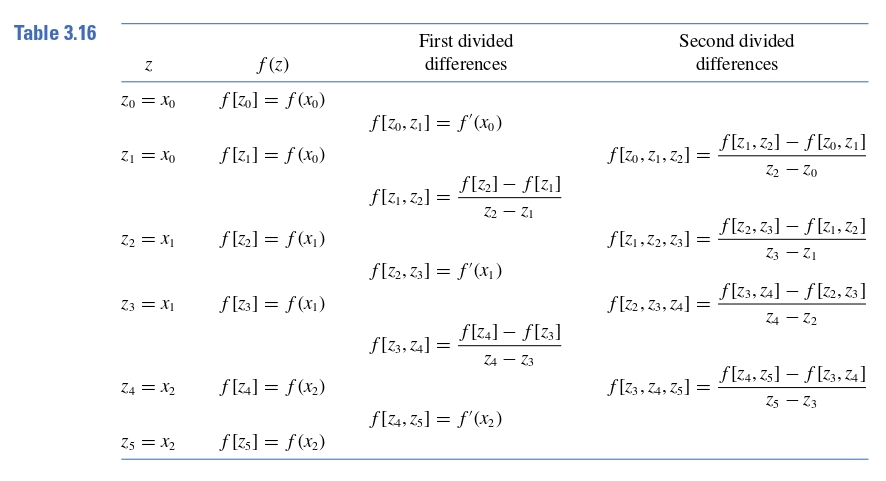

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Bab 3, "Interpolation and Polynomial Approximation". Subbab 3.4, "Hermite Interpolation". Hlm. 140

In [12]:
from tabulate import tabulate

# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

# menyusun tabel Hermite Divided Differences (HDD)
def CreateHDDTable(list_x_asli, list_y_asli, list_p):

    # === Menyusun tabel utama === #
    # mengandung kolom f(x_i) serta semua kolom divided difference

    # === MODIFIKASI HERMITE DIVIDED DIFFERENCE ===

    # Misal list_z kita ubah namanya menjadi list_x
    # dan input titik dari user masuk ke list_x_asli saja.
    # Maka kode Newton Divided Difference hampir tidak perlu diubah.
    # Kita juga punya list_p yaitu semua nilai f'(x), untuk x dari list asli.
    # Nantinya, f'(z_a) = f'(x_(a/2)) = list_p[int(a/2)],
    # atau f'(z_a) = list_pz[a] (kita buat list baru untuk turunan pada f'(z)).
    # Mari kita tentukan list_x, list_y, list_pz

    list_x = [] # aslinya list_z
    # Kita namakan list_x saja agar tidak perlu banyak modifikasi

    list_y = []
    list_pz = [] # list turunan pada f'(z)
    for i in range(len(list_x_asli)):
        # append dua kali ke list_z
        list_x.append(list_x_asli[i])
        list_x.append(list_x_asli[i])
        # agar z_(2i) = z_(2i+1) = x_i

        # begitu juga dengan list_y dari list_y_asli
        list_y.append(list_y_asli[i])
        list_y.append(list_y_asli[i])
        
        # serta list_pz dari list_p
        list_pz.append(list_p[i])
        list_pz.append(list_p[i])

    # === AKHIR MODIFIKASI ===

    MainDDTable = []
    banyak_data = len(list_x) # = n + 1
    n = banyak_data - 1
    
    # mengisi tabel dengan string kosong
    # ingat: 2n+1 baris, n+1 kolom
    for i in range(2*n+1):
        calon_baris = []
        for j in range(n+1):
            calon_baris.append("")
        MainDDTable.append(calon_baris)
    
    # mengisi kolom pertama dengan nilai y_i = f(x_i)
    for i in range(0, 2*n+1, 2): # untuk tiap baris, lompat 2
        MainDDTable[i][0] = list_y[int(i/2)]
    
    # iterasi mengisi tiap kolom divided difference
    for j in range(1, n+1): # untuk tiap kolom divided difference
        # nilai a dan b untuk DD yang paling atas pada kolom
        a = 0
        b = j # nilai b pertama adalah j, selalu sesuai kolom DD ke-j
        for i in range(j, 2*n - j + 1, 2): # untuk tiap baris, lompat 2
            # iterasi dimulai dari baris j,
            # baris terakhir adalah baris dengan indeks 2*n - j.
            # Alasannya: total baris sebanyak 2*n + 1 (indeks 2*n),
            # dan secara umum, pada kolom DD ke-j, perhitungan DD terakhir
            # adalah pada j baris sebelum baris terakhir pada tabel,
            # sehingga baris terakhir tersebut ada pada indeks 2*n - j.
            # Pada for loop, kita gunakan 2*n - j + 1
            # agar baris terakhir menjadi 2*n - j (karena keanehan Python)

            # === MODIFIKASI HERMITE DIVIDED DIFFERENCE ===
            if (((b-a)==1) and (a % 2 == 0)):
                MainDDTable[i][j] = list_pz[a] # f'(z_a)
            else:
                # kiri bawah dikurang kiri atas, dibagi (x_b - x_a)
                MainDDTable[i][j] = (MainDDTable[i+1][j-1] - MainDDTable[i-1][j-1])/(list_x[b] - list_x[a])
            # === AKHIR MODIFIKASI ===

            # memperbarui nilai a dan b untuk iterasi selanjutnya
            a += 1
            b += 1
    
    # === Menyusun tabel besar === #

    # duplikasi MainDDTable
    BigDDTable = []
    for row in MainDDTable:
        calon_baris = []
        for col in row:
            calon_baris.append(col)
        BigDDTable.append(calon_baris)

    # tempel kolom nilai i dan x_i di sebelah kiri tabel
    for i in range(2*n+1):
        indeks_x = int(i/2)
        if i % 2 == 0: # baris berindeks genap, seperti baris pertama (i=0)
            BigDDTable[i].insert(0, list_x[indeks_x])
            BigDDTable[i].insert(0, indeks_x)
        else:
            BigDDTable[i].insert(0, "")
            BigDDTable[i].insert(0, "")
    
    # menyusun list semua header
    # === MODIFIKASI HERMITE DIVIDED DIFFERENCE ===
    semua_header = ["i", "z_i", "f(z_i)"]
    # === AKHIR MODIFIKASI ===
    for k in range(1, n+1):
        semua_header.append("DD ke-" + str(k))

    olahan_BigDDTable = tabulate(BigDDTable, headers=semua_header,
                                 tablefmt="orgtbl")
    
    return MainDDTable, olahan_BigDDTable

In [13]:
titik_x = eval(input("Masukkan list nilai x : "))
titik_y = eval(input("Masukkan list nilai f(x) di titik-titik tersebut : "))
titik_p = eval(input("Masukkan list nilai f'(x) di titik-titik tersebut : "))

tabel_utama, tabel_olahan = CreateHDDTable(titik_x, titik_y, titik_p)

print("Tabel Hermite Divided Difference:")
print(tabel_olahan)

Masukkan list nilai x : [1.3, 1.6, 1.9]
Masukkan list nilai f(x) di titik-titik tersebut : [0.6200860, 0.4554022, 0.2818186]
Masukkan list nilai f'(x) di titik-titik tersebut : [-0.5220232, -0.5698959, -0.5811571]
Tabel Hermite Divided Difference:
| i   | z_i   | f(z_i)    | DD ke-1             | DD ke-2               | DD ke-3             | DD ke-4              | DD ke-5                |
|-----+-------+-----------+---------------------+-----------------------+---------------------+----------------------+------------------------|
| 0   | 1.3   | 0.620086  |                     |                       |                     |                      |                        |
|     |       |           | -0.5220232          |                       |                     |                      |                        |
| 1   | 1.3   | 0.620086  |                     | -0.08974266666666673  |                     |                      |                        |
|     |       |           | -0.5

Kemudian, kode untuk menghasilkan polinom Forward DD dan Backward DD tinggal menggunakan data dari tabel yang dihasilkan.

In [14]:
# jaga-jaga ada konstanta pi pada data titik-titik yang diberikan
from numpy import pi

from tabulate import tabulate

import sympy
x = sympy.symbols('x')

# === MODIFIKASI HERMITE DIVIDED DIFFERENCE ===

titik_x_asli = eval(input("Masukkan list nilai x : "))
titik_y = eval(input("Masukkan list nilai f(x) di titik-titik tersebut : "))
titik_p = eval(input("Masukkan list nilai f'(x) di titik-titik tersebut : "))
eval_x = eval(input('Masukkan nilai x yang akan diaproksimasi nilai fungsinya : '))

# Kita asumsikan function/fungsi CreateHDDTable sudah terdefinisi sebelumnya.
# Kalau belum terdefinisi, boleh copy-paste definisi fungsinya ke sini

tabel_utama, tabel_olahan = CreateHDDTable(titik_x_asli, titik_y, titik_p)

print("Tabel Hermite Divided Difference:")
print(tabel_olahan)
print() # jaga jarak dengan print yang selanjutnya

titik_x = []
for i in range(len(titik_x_asli)):
    titik_x.append(titik_x_asli[i])
    titik_x.append(titik_x_asli[i])

# === AKHIR MODIFIKASI ===

def ForwardDD(tabel_utama, list_x):
    banyak_data = len(tabel_utama[0])
    pol = 0
    for k in range(0, banyak_data): # tiap suku penjumlahan
        suku = tabel_utama[k][k] # FR(0, k)
        for j in range(0, k): # perkalian dari j=0 sampai j=k-1
            suku *= (x - list_x[j])
        pol += suku
    return pol

def BackwardDD(tabel_utama, list_x):
    banyak_data = len(tabel_utama[0])
    n = banyak_data - 1
    pol = 0
    for k in range(banyak_data): # tiap suku penjumlahan
        suku = tabel_utama[2*n-k][k] # FR(n-k, k)
        for j in range(n-k+1, n+1): # perkalian dari j=n-k+1 sampai j=n
            suku *= (x - list_x[j])
        pol += suku
    return pol

forw_pol = ForwardDD(tabel_utama, titik_x)
back_pol = BackwardDD(tabel_utama, titik_x)

forw_sederhana = sympy.simplify(forw_pol)
back_sederhana = sympy.simplify(back_pol)

forw_function = sympy.lambdify(x, forw_sederhana)
back_function = sympy.lambdify(x, back_sederhana)

nilai_forw = forw_function(eval_x)
nilai_back = back_function(eval_x)

print("Polinom hasil foward DD:")
sympy.pprint(forw_pol)
print()
print("disederhanakan:")
sympy.pprint(forw_sederhana)
print()

print("Polinom hasil backward DD:")
sympy.pprint(back_pol)
print()
print("disederhanakan:")
sympy.pprint(back_sederhana)
print()

print("Aproksimasi nilai fungsi di x = {0} adalah : ".format(eval_x))
print("Forward DD : {0}".format(nilai_forw))
print("Backward DD : {0}".format(nilai_back))

Masukkan list nilai x : [1.3, 1.6, 1.9]
Masukkan list nilai f(x) di titik-titik tersebut : [0.6200860, 0.4554022, 0.2818186]
Masukkan list nilai f'(x) di titik-titik tersebut : [-0.5220232, -0.5698959, -0.5811571]
Masukkan nilai x yang akan diaproksimasi nilai fungsinya : 1.5
Tabel Hermite Divided Difference:
| i   | z_i   | f(z_i)    | DD ke-1             | DD ke-2               | DD ke-3             | DD ke-4              | DD ke-5                |
|-----+-------+-----------+---------------------+-----------------------+---------------------+----------------------+------------------------|
| 0   | 1.3   | 0.620086  |                     |                       |                     |                      |                        |
|     |       |           | -0.5220232          |                       |                     |                      |                        |
| 1   | 1.3   | 0.620086  |                     | -0.08974266666666673  |                     |                  